In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
sns.set(color_codes=True)

In [2]:
bitcoin = pd.read_csv('bitcoin_dataset.csv')

In [16]:
bitcoin.tail()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09
2905,1/31/2018,10125.01333,16837687.5,1.700000e+11,9.332398e+08,154444.5903,1.042831,0,1745.948718,15.675,...,1.016284,80.529148,481100,204276,296688784,197264,141543,1785708.486,159867.3306,1.618659e+09


In [9]:
bitcoin['btc_market_price'].loc[1023]

13.6888

In [5]:
bitcoin.drop('Date',axis=1, inplace=True)

In [14]:
for i in bitcoin.columns:
    if i == 'btc_market_price':
        continue
    else:
        print(i, bitcoin['btc_market_price'].corr(bitcoin[i]))

btc_total_bitcoins 0.39247396716784383
btc_market_cap 0.9997826765218774
btc_trade_volume 0.8688125857657103
btc_blocks_size 0.6745069946160744
btc_avg_block_size 0.544032525267592
btc_n_orphaned_blocks -0.07639999339315413
btc_n_transactions_per_block 0.5441247005124085
btc_median_confirmation_time 0.2752499037014616
btc_hash_rate 0.9208760210000024
btc_difficulty 0.9169369661115323
btc_miners_revenue 0.9867320856324148
btc_transaction_fees 0.8065952049437897
btc_cost_per_transaction_percent -0.013517293631854554
btc_cost_per_transaction 0.8155073414716754
btc_n_unique_addresses 0.6639174028794771
btc_n_transactions 0.5696027129379864
btc_n_transactions_total 0.680047881341061
btc_n_transactions_excluding_popular 0.5584160467207037
btc_n_transactions_excluding_chains_longer_than_100 0.5672811999602523
btc_output_volume 0.11173404047261984
btc_estimated_transaction_volume 0.05089376533949088
btc_estimated_transaction_volume_usd 0.9683077328629317


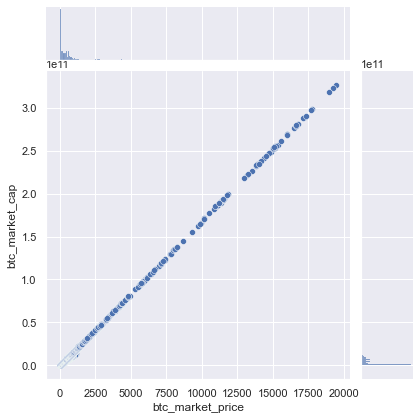

In [23]:
sns.jointplot(x='btc_market_price', y='btc_market_cap', data=bitcoin);

In [47]:
bitcoin_predict = bitcoin[['btc_market_price','btc_market_cap', 'btc_n_transactions', 'btc_miners_revenue', 'btc_cost_per_transaction', 'btc_difficulty', 'btc_hash_rate', 'btc_cost_per_transaction_percent']]

In [48]:
bitcoin_predict.head()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [49]:
bitcoin_predict=bitcoin_predict.fillna(value=bitcoin_predict.mean(axis=1))

In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [54]:
train_set, test_set = train_test_split(bitcoin_predict, test_size=0.2)

In [40]:
y = bitcoin_predict.target()

AttributeError: 'DataFrame' object has no attribute 'target'

In [59]:
X_test = test_set[['btc_market_price']]
y_test = test_set.btc_market_cap
y_pred = lm.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_test,y_pred)

5.81347240150446e+17

In [57]:
X = train_set[['btc_market_price']]
y = train_set.btc_market_cap
lm = LinearRegression(normalize=True);
lm.fit(X, y)

LinearRegression(normalize=True)